# Visualizing a electric field from a multipole

https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/

The electric field at $\mathbf{r}$ by a charge $q$ at $\mathbf{r_0}$

$$
\mathbf{E(\mathbf{r})} = \frac{q}{|\mathbf{r}-\mathbf{r_0}|^3} (\mathbf{r}-\mathbf{r_0}) 
$$

For a 2D plane, $\mathbf{r} = (x, y)$ and $\mathbf{r_0} = (x_0, y_0)$.

$$
E_x(x, y) = \frac{q}{|\mathbf{r}-\mathbf{r_0}|^3}(x - x_0)
$$

$$
E_y(x, y) = \frac{q}{|\mathbf{r}-\mathbf{r_0}|^3}(y - y_0)
$$

$$
|\mathbf{r}-\mathbf{r_0}| = \sqrt{(x - x_0)^2 + (y - y_0)^2}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from itertools import product

In [ ]:
def E(q, r0, x, y):
    """Return the electric field vector E(x,y)=(Ex, Ey) due to charge q at r0."""
    den = np.hypot(x - r0[0], y - r0[1])**3
    Ex = q * (x - r0[0]) / den
    Ey = q * (y - r0[1]) / den
    return Ex, Ey

Equally spaced $N$ points on a unit circle ($i = 0, 1, \cdots, N-1)$

$$
(\cos\theta, \sin\theta) = \left( \cos\frac{2\pi i}{N}, \sin\frac{2\pi i}{N} \right)
$$

In [ ]:
def get_E(n, nx=64, ny=64):
    # n = 1 : dipole
    # n = 2 : quadrupole
    # n = 3 : octupole
    # ...

    # Grid of x, y points
    x = np.linspace(-2, 2, nx)
    y = np.linspace(-2, 2, ny)
    X, Y = np.meshgrid(x, y)

    # Create a multipole with nq charges of alternating sign, equally spaced on the unit circle
    nq = 2**n

    charges = []
    for i in range(nq):
        q = i%2 * 2 - 1
        charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

    # Electric field vector, E=(Ex, Ey), as separate components
    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = E(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey

    return charges, x, y, Ex, Ey

In [ ]:
charges, x, y, Ex, Ey = get_E(1)

In [ ]:
charges

[(-1, (np.float64(1.0), np.float64(0.0))),
 (1, (np.float64(-1.0), np.float64(1.2246467991473532e-16)))]

In [ ]:
x

array([-2.        , -1.93650794, -1.87301587, -1.80952381, -1.74603175,
       -1.68253968, -1.61904762, -1.55555556, -1.49206349, -1.42857143,
       -1.36507937, -1.3015873 , -1.23809524, -1.17460317, -1.11111111,
       -1.04761905, -0.98412698, -0.92063492, -0.85714286, -0.79365079,
       -0.73015873, -0.66666667, -0.6031746 , -0.53968254, -0.47619048,
       -0.41269841, -0.34920635, -0.28571429, -0.22222222, -0.15873016,
       -0.0952381 , -0.03174603,  0.03174603,  0.0952381 ,  0.15873016,
        0.22222222,  0.28571429,  0.34920635,  0.41269841,  0.47619048,
        0.53968254,  0.6031746 ,  0.66666667,  0.73015873,  0.79365079,
        0.85714286,  0.92063492,  0.98412698,  1.04761905,  1.11111111,
        1.17460317,  1.23809524,  1.3015873 ,  1.36507937,  1.42857143,
        1.49206349,  1.55555556,  1.61904762,  1.68253968,  1.74603175,
        1.80952381,  1.87301587,  1.93650794,  2.        ])

In [ ]:
y

array([-2.        , -1.93650794, -1.87301587, -1.80952381, -1.74603175,
       -1.68253968, -1.61904762, -1.55555556, -1.49206349, -1.42857143,
       -1.36507937, -1.3015873 , -1.23809524, -1.17460317, -1.11111111,
       -1.04761905, -0.98412698, -0.92063492, -0.85714286, -0.79365079,
       -0.73015873, -0.66666667, -0.6031746 , -0.53968254, -0.47619048,
       -0.41269841, -0.34920635, -0.28571429, -0.22222222, -0.15873016,
       -0.0952381 , -0.03174603,  0.03174603,  0.0952381 ,  0.15873016,
        0.22222222,  0.28571429,  0.34920635,  0.41269841,  0.47619048,
        0.53968254,  0.6031746 ,  0.66666667,  0.73015873,  0.79365079,
        0.85714286,  0.92063492,  0.98412698,  1.04761905,  1.11111111,
        1.17460317,  1.23809524,  1.3015873 ,  1.36507937,  1.42857143,
        1.49206349,  1.55555556,  1.61904762,  1.68253968,  1.74603175,
        1.80952381,  1.87301587,  1.93650794,  2.        ])

In [ ]:
Ex.shape

(64, 64)

In [ ]:
Ey.shape

(64, 64)

In [ ]:
def draw_results(charges, x, y, Ex, Ey):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot the streamlines with an appropriate colormap and arrow style
    color = 2 * np.log(np.hypot(Ex, Ey))
    ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
                density=2, arrowstyle='->', arrowsize=1.5)

    # Add filled circles for the charges themselves
    charge_colors = {True: '#aa0000', False: '#0000aa'}
    for q, pos in charges:
        ax.add_artist(patches.Circle(pos, 0.05, color=charge_colors[q>0], zorder=99))

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    plt.show()

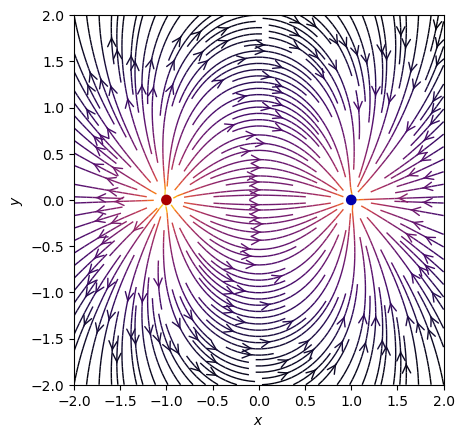

In [ ]:
# dipole
draw_results(*get_E(1))

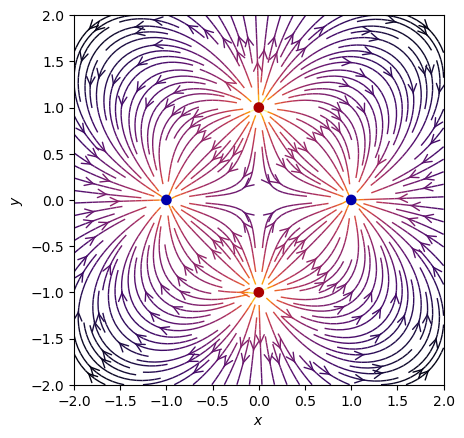

In [ ]:
# quadrupole
draw_results(*get_E(2))

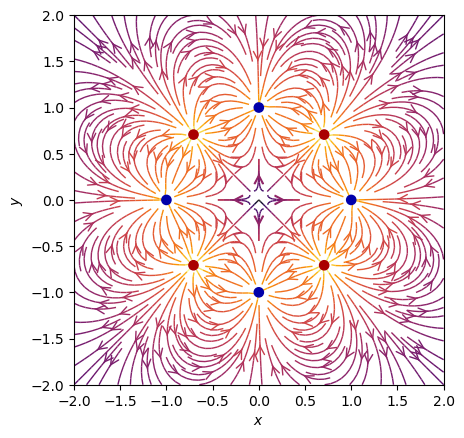

In [ ]:
# octupole
draw_results(*get_E(3))

## Solving streamline ODE

https://www.numbercrunch.de/blog/2013/05/visualizing-streamlines/

In [ ]:
from scipy.integrate import ode

In [ ]:
def draw_streamlines(n):
    # Create a multipole with nq charges of alternating sign, equally spaced on the unit circle
    nq = 2**n

    charges = []
    for i in range(nq):
        q = i%2 * 2 - 1
        charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))


    R = 0.01

    def E(q, r0, x, y):
        den = np.hypot(x - r0[0], y - r0[1])**3
        Ex = q * (x - r0[0]) / den
        Ey = q * (y - r0[1]) / den
        return Ex, Ey

    def E_total(x, y, charges):
        Ex, Ey = 0, 0
        for C in charges:
            q, pos = C
            ex, ey = E(q, pos, x, y)
            Ex += ex
            Ey += ey
        return Ex, Ey

    def streamline(t, y, charges):
        Ex, Ey = E_total(y[0], y[1], charges)
        Emag = np.hypot(Ex, Ey)
        return [Ex/Emag, Ey/Emag]

    x0, x1 = -2, 2
    y0, y1 = -2, 2

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    N = 16
    for C in charges:
        q, pos = C
        dt = 0.8*R
        if q < 0:
            dt = -dt
        for alpha in np.linspace(0, 2*np.pi*(N-1)/N, N):
            r = ode(streamline)
            r.set_integrator('vode')
            r.set_f_params(charges)
            xp = [ pos[0] + R*np.cos(alpha) ]
            yp = [ pos[1] + R*np.sin(alpha) ]
            r.set_initial_value([xp[0], yp[0]], t=0.0)
            while r.successful():
                r.integrate(r.t + dt)
                xp.append(r.y[0])
                yp.append(r.y[1])
                hit_charge = False
                for C2 in charges:
                    _, pos2 = C2
                    distance = np.hypot(r.y[0] - pos2[0], r.y[1] - pos2[1])
                    if distance < R:
                        hit_charge = True
                x_inside = x0 < r.y[0]  and r.y[0] < x1
                y_inside = y0 < r.y[1]  and r.y[1] < y1
                if hit_charge or (not x_inside) or (not y_inside):
                    break
            ax.plot(xp, yp, '-k')

    # Add filled circles for the charges themselves
    charge_colors = {True: '#aa0000', False: '#0000aa'}
    for q, pos in charges:
        ax.add_artist(patches.Circle(pos, 0.05, color=charge_colors[q>0], zorder=99))

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    plt.show()

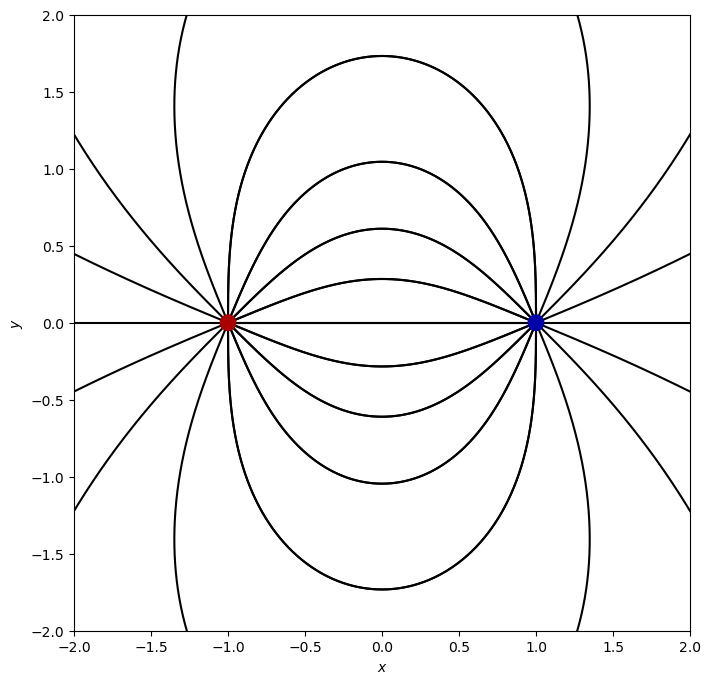

In [ ]:
# dipole
draw_streamlines(1)

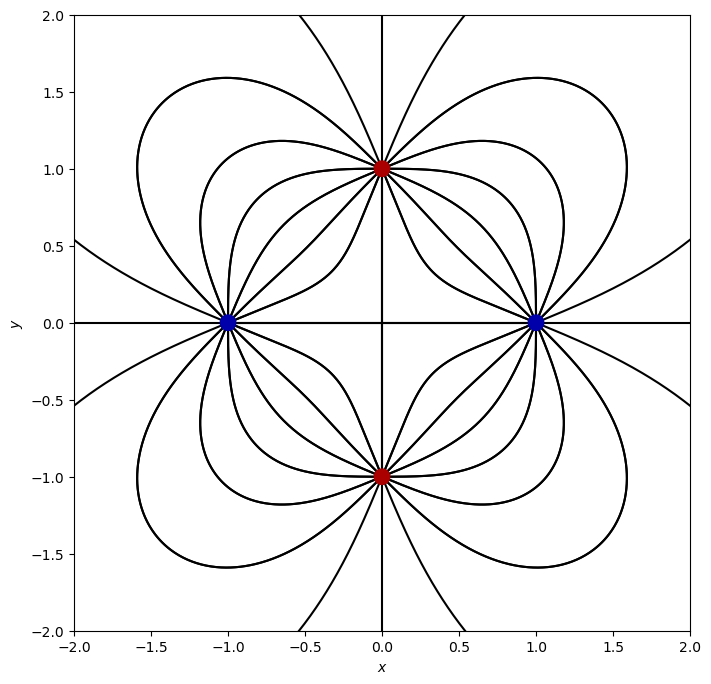

In [ ]:
# quadrupole
draw_streamlines(2)

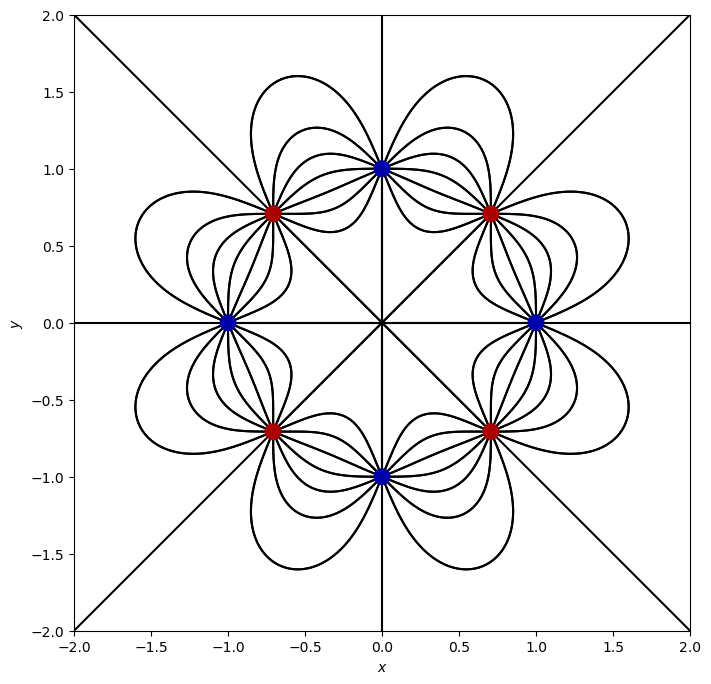

In [ ]:
# octupole
draw_streamlines(3)

# Electric potential

https://pythonmatplotlibtips.blogspot.com/2017/12/draw-beautiful-electric-field-lines.html

The electric potential at $\mathbf{r}$ by a charge $q$ at $\mathbf{r_0}$

$$
V(\mathbf{r}) = \frac{q}{|\mathbf{r}-\mathbf{r_0}|}
$$

In [ ]:
class charge:
    def __init__(self, q, pos):
        self.q=q
        self.pos=pos


def E_point_charge(q, r0, x, y):
        den = np.hypot(x - r0[0], y - r0[1])**3
        Ex = q * (x - r0[0]) / den
        Ey = q * (y - r0[1]) / den
        return Ex, Ey


def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        ex, ey = E_point_charge(C.q, C.pos, x, y)
        Ex += ex
        Ey += ey
    return Ex, Ey


def streamline(t, y, charges):
    Ex, Ey = E_total(y[0], y[1], charges)
    Emag = np.hypot(Ex, Ey)
    return [Ex/Emag, Ey/Emag]


def V_point_charge(q, r0, x, y):
    den = np.hypot(x - r0[0], y - r0[1])
    return q / den


def V_total(x, y, charges):
    V=0
    for C in charges:
        Vp = V_point_charge(C.q, C.pos, x, y)
        V += Vp
    return V


def get_multipole(n):
    # Create a multipole with nq charges of alternating sign, equally spaced on the unit circle
    nq = 2**n

    charges = []
    for i in range(nq):
        q = i%2 * 2 - 1
        C = charge(q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq)))
        charges.append(C)
    
    return charges

In [ ]:
def draw_streamlines_potential(
        charges,
        x0 = -2, x1 = 2,
        y0 = -2, y1 = 2,
        clim0 = -2, clim1 = 2,
    ):
    # calculate field lines
    xs, ys = [], []
    R = 0.01
    N = 16
    for C in charges:
        dt = 0.8*R
        if C.q < 0:
            dt = -dt
        for alpha in np.linspace(0, 2*np.pi*(N-1)/N, N):
            r = ode(streamline)
            r.set_integrator('vode')
            r.set_f_params(charges)
            xp = [ C.pos[0] + R*np.cos(alpha) ]
            yp = [ C.pos[1] + R*np.sin(alpha) ]
            r.set_initial_value([xp[0], yp[0]], t=0.0)
            while r.successful():
                r.integrate(r.t + dt)
                xp.append(r.y[0])
                yp.append(r.y[1])
                hit_charge = False
                for C2 in charges:
                    distance = np.hypot(r.y[0] - C2.pos[0], r.y[1] - C2.pos[1])
                    if distance < R:
                        hit_charge = True
                x_inside = x0 < r.y[0]  and r.y[0] < x1
                y_inside = y0 < r.y[1]  and r.y[1] < y1
                if hit_charge or (not x_inside) or (not y_inside):
                    break
            xs.append(xp)
            ys.append(yp)

    # calculate electric potential
    # itertools.product => cartesian product, equivalent to a nested for-loop
    numcalcv = 300
    xxs = []
    yys = []
    vvs = []
    for xx, yy in product(np.linspace(x0, x1, numcalcv), np.linspace(y0, y1, numcalcv)):
        xxs.append(xx)
        yys.append(yy)
        vvs.append(V_total(xx,yy,charges))
    xxs = np.array(xxs)
    yys = np.array(yys)
    vvs = np.array(vvs)

    # plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    # plot field line
    for xp, yp in zip(xs,ys):
        ax.plot(xp, yp, linestyle='-', color='k')

    # plot point charges
    for C in charges:
        if C.q>0:
            plt.plot(C.pos[0], C.pos[1], 'ro', ms=8*np.sqrt(C.q))
        if C.q<0:
            plt.plot(C.pos[0], C.pos[1], 'bo', ms=8*np.sqrt(-C.q))

    # plot electric potential
    vvs[np.where(vvs<clim0)] = clim0*0.999999 # to avoid error
    vvs[np.where(vvs>clim1)] = clim1*0.999999 # to avoid error

    # tricontour supports unordered, irregularly spaced coordinates
    ax.tricontour(xxs, yys, vvs, 10, colors="0.3")
    cf = ax.tricontourf(xxs, yys, vvs, 100, cmap=plt.cm.plasma)
    cbar = plt.colorbar(cf)
    cbar.set_ticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
    cbar.set_label("Electric Potential")

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.axis('equal')
    plt.show()

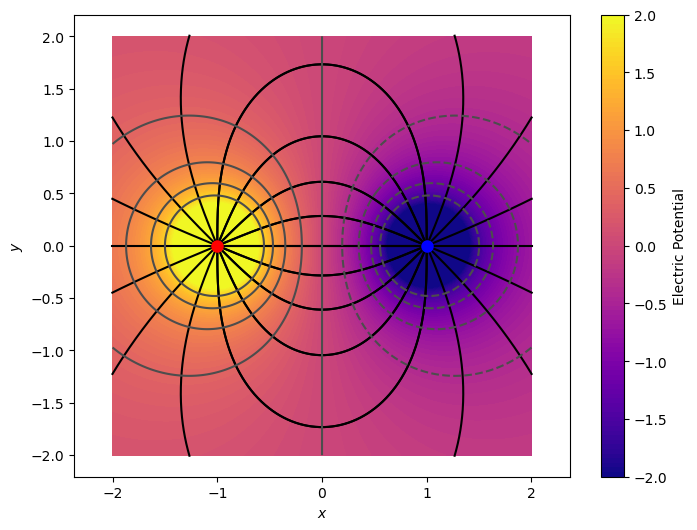

In [ ]:
charges = get_multipole(1)
draw_streamlines_potential(charges)

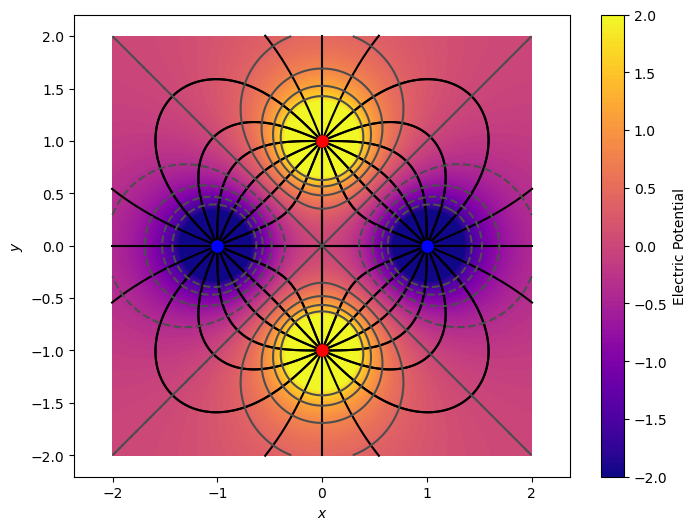

In [ ]:
charges = get_multipole(2)
draw_streamlines_potential(charges)

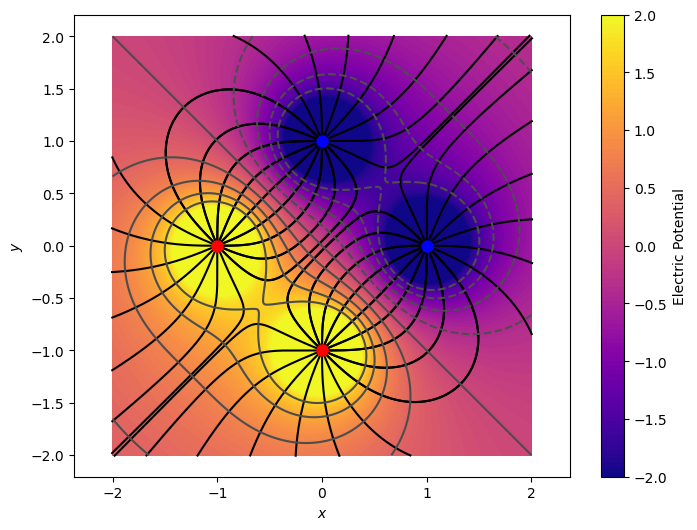

In [ ]:
charges = [charge(1, [-1, 0]), 
           charge(-1, [1, 0]), 
           charge(-1, [0, 1]), 
           charge(1, [0, -1]) ]
draw_streamlines_potential(charges)

https://pythonmatplotlibtips.blogspot.com/2017/12/draw-electric-field-lines-without-mayavi.html

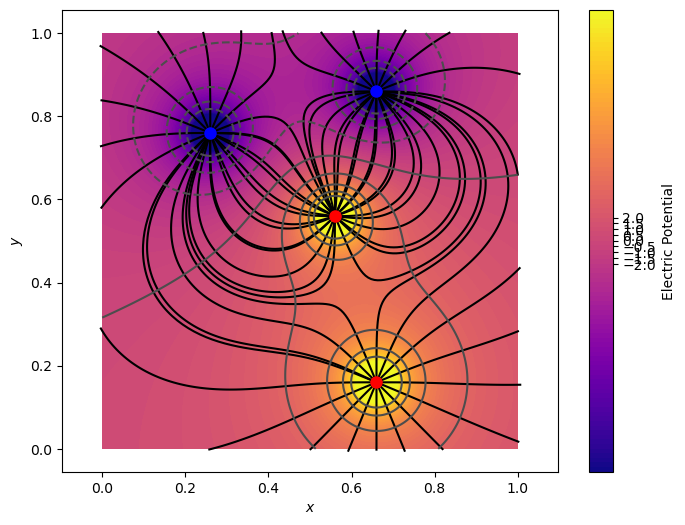

In [ ]:
charges = [charge( 1, [0.56, 0.56]),
           charge(-1, [0.26, 0.76]),
           charge( 1, [0.66, 0.16]),
           charge(-1, [0.66, 0.86]) ]
draw_streamlines_potential(
    charges,
    x0 = 0, x1 = 1,
    y0 = 0, y1 = 1,
    clim0 = -20, clim1 = 20,
)

## 3D

https://pythonmatplotlibtips.blogspot.com/2017/12/draw-continuous-electric-field-lines-3d-plotly.html

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
class charge:
    def __init__(self, q, pos):
        self.q=q
        self.pos=pos
 
def E_point_charge(q, a, x, y, z):
    den = np.sqrt((x-a[0])**2+(y-a[1])**2+(z-a[2])**2)**3
    return q*(x-a[0])/den, q*(y-a[1])/den, q*(z-a[2])/den
 
def E_total(x, y, z, charges):
    Ex, Ey, Ez = 0, 0, 0
    for C in charges:
        E = E_point_charge(C.q, C.pos, x, y, z)
        Ex += E[0]
        Ey += E[1]
        Ez += E[2]
    return [ Ex, Ey, Ez ]

def E_dir(t, p, charges):
    Ex, Ey, Ez = E_total(p[0], p[1], p[2], charges)
    n = np.sqrt(Ex**2+Ey**2+Ez**2)
    return [Ex/n, Ey/n, Ez/n]

def V_point_charge(q, p, x, y, z):
    den = np.sqrt((x-p[0])**2+(y-p[1])**2+(z-p[2])**2)
    return q/den

def V_total(x, y, z, charges):
    V = 0
    for C in charges:
        Vp = V_point_charge(C.q, C.pos, x, y, z)
        V += Vp
    return V

The Cartesian coordinates $(x, y, z)$ is related to the spherical coordinates $(r, \theta, \varphi)$ as follows:

$$
\begin{aligned}
x & = r\sin\theta\cos\varphi \\
y & = r\sin\theta\sin\varphi \\
z & = r\cos\theta \\
\end{aligned}
$$

where $r \in [0, \infty)$, $\theta \in [0, \pi]$, $\varphi \in [0, 2\pi)$.

In [ ]:
# charges and positions
charges=[ 
    charge(-1, [-1, 0, 0]), 
    charge( 1, [ 1, 0, 0]) 
]
 
# domain
x0, x1 = -2, 2
y0, y1 = -2, 2
z0, z1 = -2, 2

# calculate field lines
xs, ys, zs = [], [], []

N = 8
R = 0.3
for C in charges:
    # calculate field lines starting in current charge
    dt = 0.8*R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in different directions around current charge
    for theta, phi in product(np.linspace(0, np.pi, N), np.linspace(0, 2*np.pi*(N-1)/N, N)):
        r=ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        # initial position of the electric field line
        x=[ C.pos[0] + np.sin(theta)*np.cos(phi)*R ]
        y=[ C.pos[1] + np.sin(theta)*np.sin(phi)*R ]
        z=[ C.pos[2] + np.cos(theta)*R ]
        r.set_initial_value([x[0], y[0], z[0]], 0)
        while r.successful():
            r.integrate(r.t + dt)
            x.append(r.y[0])
            y.append(r.y[1])
            z.append(r.y[2])
            hit_charge = False
            # check if field line left drwaing area or ends in some charge
            for C2 in charges:
                dist = np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2+(r.y[2]-C2.pos[2])**2)
                if dist < R:
                    hit_charge=True
            x_inside = x0 < r.y[0]  and r.y[0] < x1
            y_inside = y0 < r.y[1]  and r.y[1] < y1
            z_inside = z0 < r.y[2]  and r.y[2] < z1
            if hit_charge or (not x_inside) or (not y_inside) or (not z_inside):
                break
        xs.append(x)
        ys.append(y)
        zs.append(z)

data = []
for x, y, z in zip(xs, ys, zs):
    trace = go.Scatter3d(
        x=x, y=y, z=z,
        line=dict(color='#000000'),
        mode="lines",
        name="",
        showlegend=False,
    )
    data.append(trace)

# colormap of the electric field
# here, the cm.plasma is used
cmfunc = lambda x: 255*plt.cm.plasma(x)
pl_BrBG = [ [x, "rgb(%d,%d,%d)"%(255*cmfunc(x)[0],255*cmfunc(x)[1],255*cmfunc(x)[2])] for x in np.linspace(0,1,11) ]

def get_the_slice(x, y, z, surfacecolor, colorscale=pl_BrBG, showscale=False):
    # https://plot.ly/python/reference/#surface
    return go.Surface(
        x=x,
        y=y,
        z=z,
        surfacecolor=surfacecolor,
        colorscale=colorscale,
        showscale=showscale,
        name=""
    )

def get_lims_colors(surfacecolor):# color limits for a slice
    return np.min(surfacecolor), np.max(surfacecolor)

# z=0 slice
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
x, y = np.meshgrid(x, y)
z = np.zeros(x.shape)
surfcolor_z = V_total(x, y, z,charges)
slice_z = get_the_slice(x, y, z, surfcolor_z)

# y=0 slice
x = np.linspace(-2, 2, 20)
z = np.linspace(-2, 2, 20)
x, z=np.meshgrid(x, y)
y=np.zeros(x.shape)
surfcolor_y = V_total(x, y, z, charges)
slice_y = get_the_slice(x, y, z, surfcolor_y)

vmin, vmax = -3, 3
slice_z.update(cmin=vmin, cmax=vmax)
slice_y.update(cmin=vmin, cmax=vmax, 
               showscale=True,
               colorbar=go.surface.ColorBar(title='Potential [a.u.]'))

data.append(slice_z)
data.append(slice_y)

axis = dict(
    showbackground=True, 
    backgroundcolor="rgb(230, 230,230)",
    gridcolor="rgb(255, 255, 255)",      
    zerolinecolor="rgb(255, 255, 255)",  
)

layout = go.Layout(
    width=700,
    height=700,
    scene=go.layout.Scene(
        xaxis=go.layout.scene.XAxis(axis),
        yaxis=go.layout.scene.YAxis(axis), 
        zaxis=go.layout.scene.ZAxis(axis, range=[-2, 2]), 
        aspectratio=dict(x=1, y=1, z=1),
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig)